### EXAMINING INSURANCE DATA
#### Introducing the Data

_age_: age of primary beneficiary.    
_sex_: insurance contractor gender, female, male.    
_bmi_: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.    
_children_: Number of children covered by health insurance / Number of dependents.    
_smoker_: whether or not the person is a smoker.  
_region_: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.  
_charges_: Individual medical costs billed by health insurance.  

#### Multivariate Linear Regression

The first machine learning model created is a **multivariate linear regression** model to predict the expected insurance charges for individuals. The features that shall be used to predict the charges are the individual's age, their gender, their BMI, the number of children they have and whether or not they are a smoker. The model that we shall estimate is:

$$charges\ =\ \beta_0\ +\ \beta_1\cdot age\ + \beta_2\cdot gender\ +\ \beta_3\cdot BMI\ +\ \beta_4\cdot children\ +\ \beta_5\cdot smoker$$

The first step is to import the relevant libraries and modules. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import seaborn as sns; sns.set()
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors

The next step is to load the data, which is stored as a CSV file. This data is stored in a Pandas Dataframe as "data".

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Since the data contains binary categorical variables which need to be used in the regression, it is necessary to assign binary numerical values to the categorical variables. Therefore, if an individual is male, we replace the value for gender with a 1; similarly for females we replace the value with a 0. A similar change needs to be made for the smoker variable, where smokers are assigned with 1 and non-smokers are assigned a 0. 

Additionally, the values for charges are rounded off to 2 decimal places, as the charges are monetary values and therefore are generally measured to the nearest cent.

In [4]:
data['sex'].replace('female', 0, inplace = True)
data['sex'].replace('male', 1, inplace = True)
data['smoker'].replace('yes', 1, inplace = True)
data['smoker'].replace('no', 0, inplace = True)
data['charges'] = data['charges'].round(2)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92
1,18,1,33.770,1,0,southeast,1725.55
2,28,1,33.000,3,0,southeast,4449.46
3,33,1,22.705,0,0,northwest,21984.47
4,32,1,28.880,0,0,northwest,3866.86


A scatter plot is created to visualise any relationship between the age of the individuals and their BMI. By just observing the plot, there is no apparent linear relationship between the two variables.

Text(0, 0.5, 'BMI')

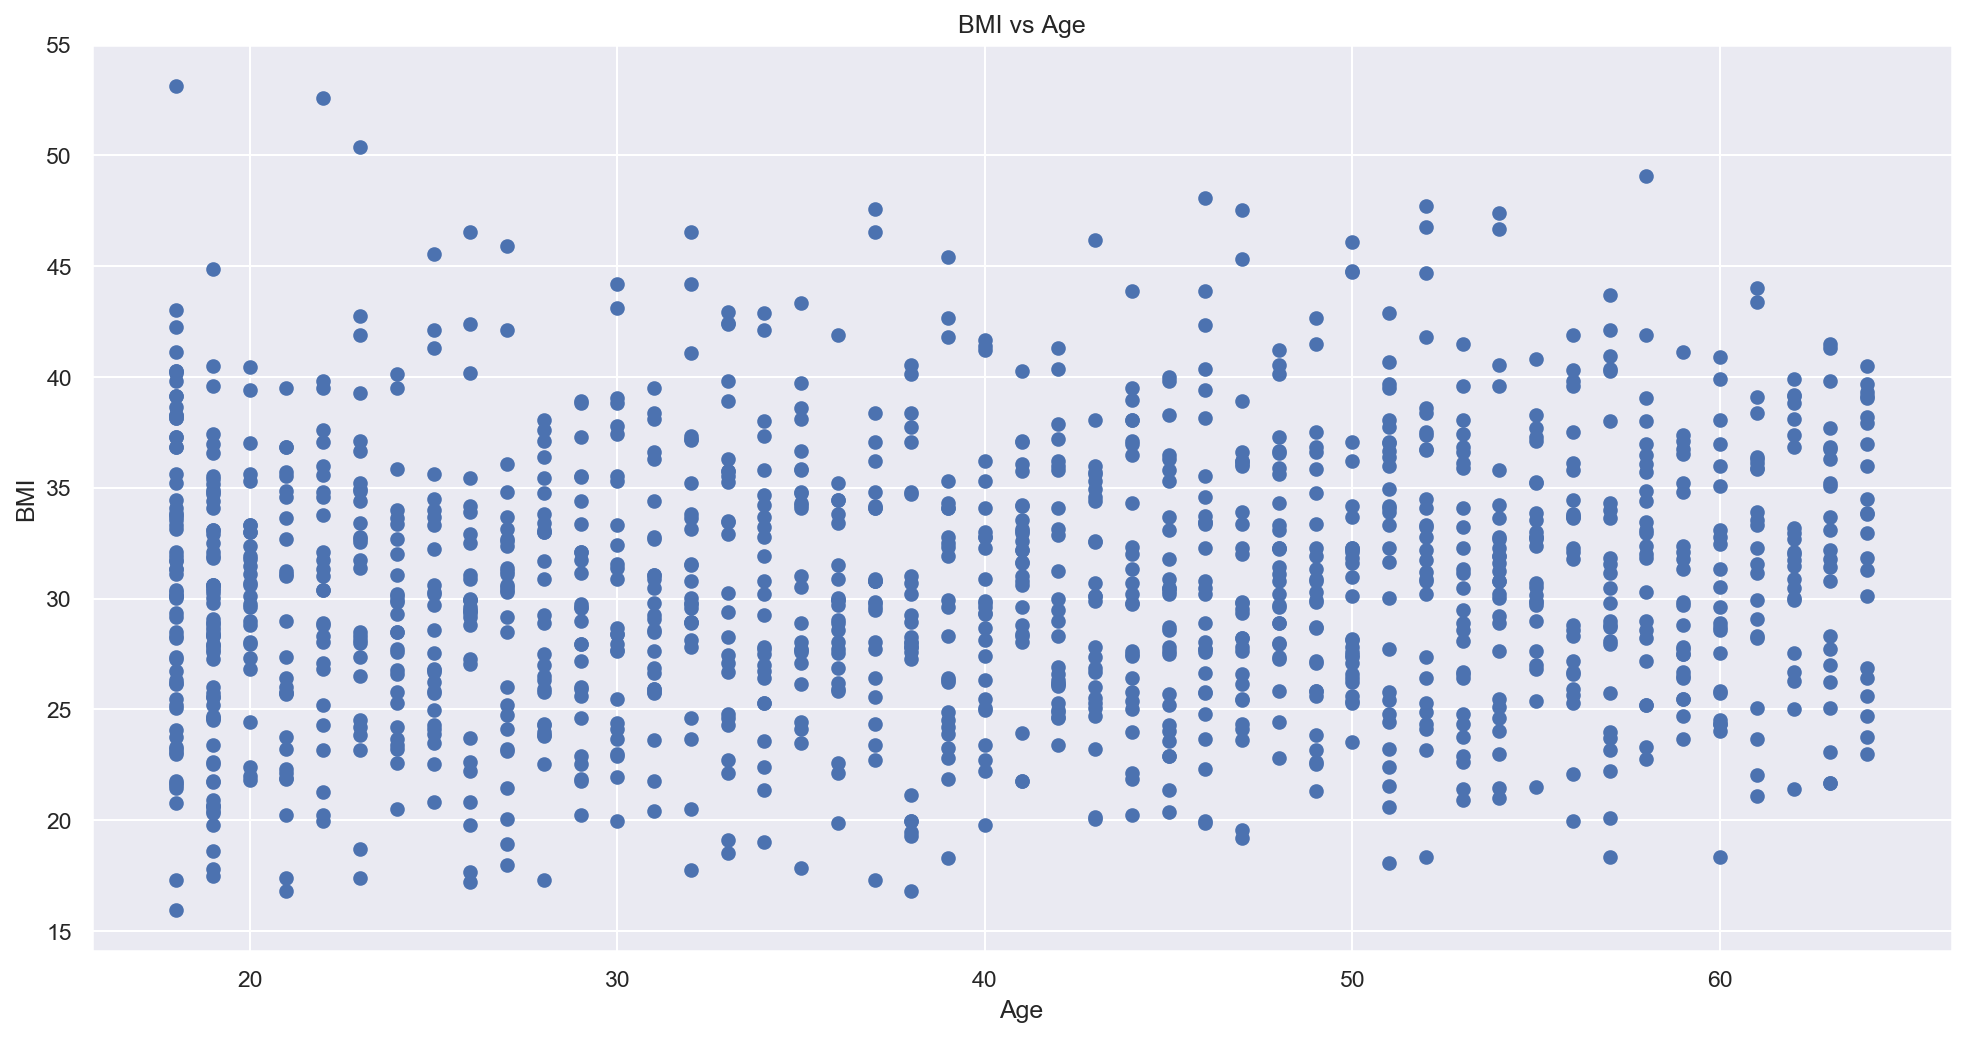

In [6]:
plt.figure(figsize=(16, 8), dpi = 150)
plt.scatter(data['age'], data['bmi'])
plt.title('BMI vs Age')
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)

It is still important to test any linear relationship between the age and children, as well as the age and BMI. Since these are explanatory variables which may possibly be correlated, it is necessary to test for relationships before they are added to the regression together. 

In [22]:
print("Correlation between age and children:", round(data['age'].corr(data['children'], method = 'pearson'), 5))
print("Correlation between age and BMI:", round(data['age'].corr(data['bmi'], method = 'pearson'), 5))

Correlation between age and children: 0.04247

Correlation between age and BMI: 0.10927


There are two variables that need to be created. The variable 'X' is an array which contains all the explantory variables, while 'y' stores the predicted variable i.e. insurance charges. It is important to split the data into a training set (70% of the dataset) and a test set (30% of the dataset). Finally, the R-squared value is used to judge the model fit.

In [6]:
X = data.values[:, 0:5]
y = data.values[:, - 1].reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = linear_model.LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R-squared score:", round(metrics.r2_score(y_test, y_pred), 5))

R-squared score: 0.76809


As can be seen from the R-squared value, approximately 76.81% of the variation in insurance charges is explained by this linear regression model.

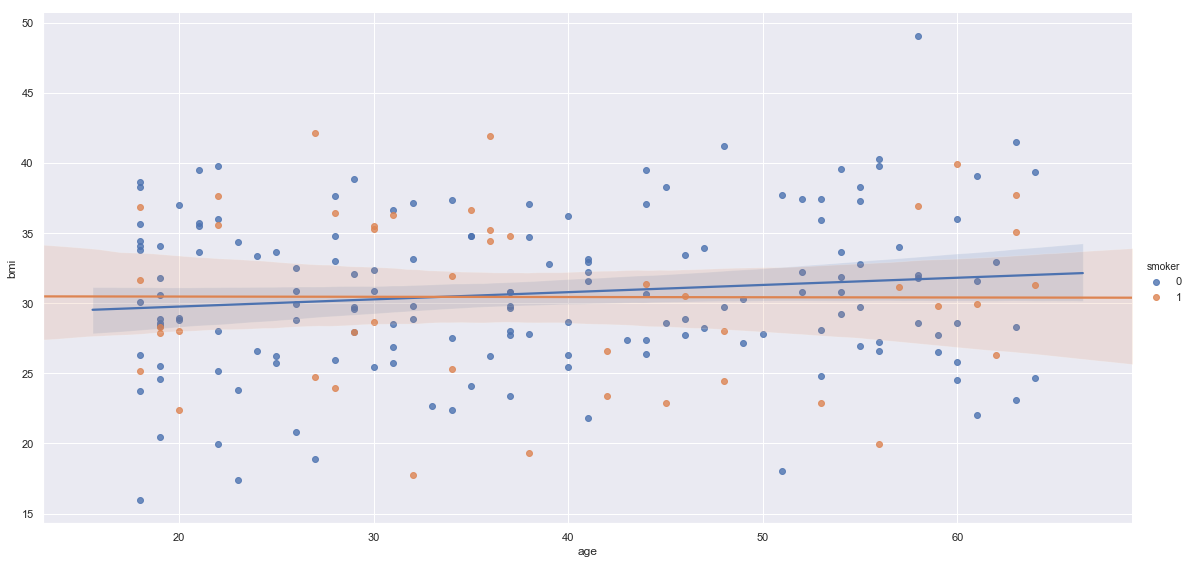

In [118]:
sns.lmplot(x = 'age', y = 'bmi', hue = "smoker", height = 8, aspect = 2, data = data_sns)

#### Logistic Regression

**Logistic regression** is used in classification problems. The model outlined below is used to predict whether or not a person is a smoker. The features used to make this prediction are: age, sex, BMI, children and charges.

The first step is to create two arrays that contain the explanatory variables and the predicted variable. The regression model needs to be trained using a training set (70% of the dataset), after which it is tested using a test set (30% of the dataset). Finally, the accuracy of the model is tested using an accuracy score.

In [13]:
X = data.values[:, [0, 1, 2, 3, -1]]
y = data.values[:, 4].reshape(-1, 1)

y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
log = linear_model.LogisticRegression(solver = 'liblinear').fit(X_train, np.ravel(y_train))

y_pred = log.predict(X_test)
y_pred_proba = log.predict_proba(X_test)

print("Accuracy Score:", round(metrics.accuracy_score(y_test, y_pred), 5))

Accuracy Score: 0.95522


From the results obtained, the model created accurately predicts whether or not an individual in this dataset is a smoker in 95.52% instances.

#### k-Nearest Neighbours Regression

In [10]:
X = data.values[:, 0:5]
y = data.values[:, - 1].reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
neigh = neighbors.KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)

# Use the model to predict X_test
y_pred = neigh.predict(X_test)
# R-squared score: 1 is perfect prediction
print('R-squared score:', metrics.r2_score(y_test, y_pred))

R-squared score: 0.32084774046043796
